### **MATH 4042U Project 1 - Principal Component Analysis on NBA Statistics**

#### **1. Choosing your dataset.**

The dataset I chose to apply principal component analysis on is an NBA player statistics dataset from the 2023-2024 season. I chose this dataset for a few reasons:
1) I have done an exploratory data analysis on a similar dataset for a previous class, and I love continuing exploration on a dataset to get the absolute most out of it. Previously, I found basic linear trends between two feautures/variables.
2) Basketball is a great passion of mine. I have played basketball my whole life, so I find it fascinating now that after all of these years, I am able to analyze relationships and trends with a variety of techniques. 
3) It's a very good dataset due to its size (number of players and number of feautures) and the type of data it contains -- most is numeric, but we have a few categorical variables such as team and position. 

I think PCA will provide some interesting insights to this data. If you think about what PCA will do with this dataset, it essentially will start with the mean vector, which in this case is the average NBA player (average points per game, average number of games played, etc.), then see how much each player varies from the average player (represented by the principal components). At first, I will apply PCA to the original dataset, then, based on my results, I may filter the data by position, then apply PCA again. The reason for this is that, an average NBA player won't provide too much significance, as each position varies in what their role is on the court. For example, on average, a point guard (PG) will have more assists than a center (C), and moreover, a center will have more rebounds than a point guard. Therefore, it may be beneficial if we filter based on the players' position, but let's find out! 

In [2]:
# importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# importing dataset from kaggle (https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats?resource=download)
data = pd.read_csv("regular_player_stats.csv", sep = ";", encoding="ISO-8859-1")
display(data) # 735 x 30

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


#### **About My Dataset** 

+500 rows and 30 columns.
Columns' description are listed below.

Rk : Rank

Player : Player's name

Pos : Position

Age : Player's age

Tm : Team

G : Games played

GS : Games started

MP : Minutes played per game

FG : Field goals per game

FGA : Field goal attempts per game

FG% : Field goal percentage

3P : 3-point field goals per game

3PA : 3-point field goal attempts per game

3P% : 3-point field goal percentage

2P : 2-point field goals per game

2PA : 2-point field goal attempts per game

2P% : 2-point field goal percentage

eFG% : Effective field goal percentage

FT : Free throws per game

FTA : Free throw attempts per game

FT% : Free throw percentage

ORB : Offensive rebounds per game

DRB : Defensive rebounds per game

TRB : Total rebounds per game

AST : Assists per game

STL : Steals per game

BLK : Blocks per game

TOV : Turnovers per game

PF : Personal fouls per game

PTS : Points per game

In [3]:
# cleaning up my data

# removing duplicate players (if they got traded to another team, they would show up twice)
data = data.drop_duplicates("Player")
# 572 x 30 dataset

# drop all rows with NaN values
data = data.dropna()
# there were no NaN values, so size remains the samne

# now, I am removing columns that I am not interested in (not needed for this analysis)
data = data.drop(data.columns[[0, 1, 2, 4, 6, 8, 9, 11, 12, 14, 15, 18, 19, 20]], axis=1)
# 572 x 18 dataset

display(data)


,Age,G,MP,FG%,3P%,2P%,eFG%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24,74,21.9,0.501,0.268,0.562,0.529,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
3,26,71,34.0,0.521,0.357,0.528,0.529,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,23,78,21.0,0.411,0.294,0.523,0.483,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
7,23,61,26.5,0.435,0.349,0.534,0.528,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,25,82,23.4,0.439,0.391,0.517,0.560,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,35,33,13.3,0.602,0.143,0.634,0.606,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2
731,25,54,36.0,0.430,0.373,0.479,0.516,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,25,48,11.4,0.538,0.208,0.588,0.552,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,31,43,7.4,0.419,0.333,0.424,0.427,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


#### **2. Constructing your data matrix.**

Below, I calculate the mean vector, covariance matrix, and correlation matrix. As mentioned above, the mean vector represents the "average" NBA player from the 2023-2024 season across all 16 features. 

The covariance matrix shows how two variables/features vary together. A positive covariance indicates that the two variables tend to increase or decrease together (proportional relationship), while a negative covariance suggests an inverse relationship (one increases as the other decreases). If the covariance is close to zero, it means there is little to no linear relationship between the two features. The correlation matrix is just a standardized version of the covariance matrix, making the relationships easier to interpret. 

That being said, this means that if the covariance matrix and the correlation matrix look very different, this is a strong indicator that we should standardize our data, as the variables are on different scales. When looking at `cov_matrix` vs. `correlation_matrix`, we see that these matrices are extremely different, therefore indicating that we should standardize our data. This makes sense, because we have data on many different scales (for example: points per game vs. shooting percentages). When we standardize the data, we ensure that all variables have equal contributions when performing principal component analysis, as PCA relies on the variation of the data to determine the principal components. Therefore, if we did not standardize, the principal components would be dominated by the feautures that have a larger magnitude of variation.  

In [4]:
# converting my dataset into a matrix
# row: player
# column: unique variables for each player/row

A = data.to_numpy() 
print(A)
print(A.shape)

[[24.  74.  21.9 ...  1.1  1.9  7.6]
 [26.  71.  34.  ...  2.3  2.2 19.3]
 [23.  78.  21.  ...  0.8  1.5  5.8]
 ...
 [25.  48.  11.4 ...  0.8  1.1  4.6]
 [31.  43.   7.4 ...  0.4  1.   1.8]
 [26.  68.  26.4 ...  1.2  2.6 11.7]]
(572, 16)


#### **Mean Vector, Covariance Matrix, and Correlation Matrix**

In [5]:
# mean vector
mean_vector = A.mean(axis=0)

# centre data (subtract mean from each column)
A_cent = A - mean_vector

# covariance matrix
n = A.shape[0]  # Number of observations (rows)
cov_matrix = (1 / (n - 1)) * np.matmul(np.transpose(A_cent), A_cent)

# correlation matrix
std_dev = np.std(A, axis=0, ddof=1)  # Standard deviation of each column
correlation_matrix = cov_matrix / np.outer(std_dev, std_dev)

# print results
print("Mean Vector:\n", mean_vector)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nCorrelation Matrix:\n", correlation_matrix)


Mean Vector:
 [25.74300699 46.15384615 18.6506993   0.44958392  0.29948077  0.51967483
  0.51649825  0.85769231  2.5229021   3.37307692  2.0013986   0.59125874
  0.4027972   0.98461538  1.49090909  8.42325175]

Covariance Matrix:
 [[ 1.78515272e+01  1.85702546e+01  6.84212399e+00  1.98333374e-02
   5.61062576e-02 -4.72994869e-03  4.16729300e-02  1.01239391e-02
   8.86981801e-01  8.94119628e-01  1.44764552e+00  2.15613021e-01
   3.69723097e-02  2.62764381e-01  2.71389906e-01  3.39933101e+00]
 [ 1.85702546e+01  6.52084871e+02  1.77454358e+02  1.00908689e+00
   1.37325515e+00  9.35782164e-01  1.25733127e+00  6.01597737e+00
   2.55236158e+01  3.15150074e+01  2.23148457e+01  4.83374646e+00
   3.63266873e+00  1.01134043e+01  1.18807356e+01  1.02654385e+02]
 [ 6.84212399e+00  1.77454358e+02  9.81470923e+01  3.29542673e-01
   4.71693446e-01  2.75185166e-01  3.97839318e-01  3.15502088e+00
   1.41250890e+01  1.72626283e+01  1.38910673e+01  2.96969089e+00
   1.88999804e+00  6.42824195e+00  6.0843

#### **3. Perform principal component analysis on your data matrix.**

- List the first three principal components and the associated principal values
- How do these vectors and scalars relate to your matrix in part 2?
- Discuss your findings/interpret your principal components
- Can you use PCA for your dataset to perform dimension reduction? What is the resulting dimension of your data?


PCA:


,Principal Component,Explained Variance (%),Cumulative Variance (%),Eigenvalue/Principal Value
0,PC1,48.170109,48.170109,7.720715
1,PC2,15.229227,63.399335,2.440944
2,PC3,10.922021,74.321356,1.750584
3,PC4,6.084492,80.405849,0.975224
4,PC5,4.984537,85.390386,0.798923
5,PC6,3.208806,88.599192,0.514308
6,PC7,2.902970,91.502161,0.465289
7,PC8,2.339008,93.841169,0.374897
8,PC9,1.833724,95.674893,0.293910
9,PC10,1.373592,97.048486,0.220160


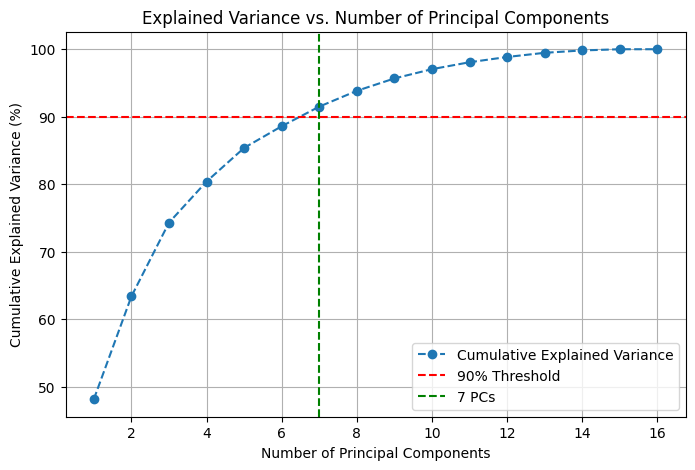


First 5 Rows of PCA Transformed Data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,2.076403,-1.258096,1.793435,0.051427,1.079515,-0.352869,-0.401997,-0.316806,-0.520056,-0.379190,0.346703,0.609361,-0.086169,-0.176249,-0.011663,0.004283
1,5.396389,0.535067,1.636788,0.048488,0.439007,0.943997,-0.677518,-0.641377,-0.562579,0.520522,0.108261,-0.400748,0.528629,0.008756,0.271618,0.032338
2,-0.141558,-0.048921,0.155520,-0.407637,0.892979,-1.162661,-0.137436,0.564104,-0.486519,-0.064825,0.136695,0.259622,-0.020405,-0.293610,0.044950,0.034753
3,1.742859,-0.034753,0.764125,-0.477279,0.874243,0.303255,-0.209123,0.457951,-0.577812,0.413662,0.141019,-0.405767,-0.123323,-0.245248,-0.032551,0.006091
4,0.420986,0.392652,-1.216721,-0.212223,0.721916,-1.077058,0.214520,0.594124,-0.351278,-0.321009,0.003436,-0.093789,-0.096252,-0.147324,-0.080201,0.003694



Principal Component Vectors:


,Age,G,MP,FG%,3P%,2P%,eFG%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
PC1,0.054216,0.254287,0.327467,0.202046,0.092669,0.149255,0.196105,0.232064,0.322660,0.314930,0.249771,0.264632,0.231912,0.294906,0.299195,0.308528
PC2,0.079928,0.039406,0.186699,-0.476170,0.107665,-0.468223,-0.419316,-0.220805,-0.002334,-0.069522,0.313900,0.205088,-0.166096,0.239421,0.023919,0.210104
PC3,-0.148609,-0.191239,-0.062522,-0.179768,-0.517000,-0.225570,-0.358731,0.420215,0.219192,0.294717,-0.167070,-0.074631,0.312837,-0.024556,0.088245,-0.083884
PC4,0.961685,0.091085,-0.020325,-0.015803,-0.057790,-0.081523,-0.009625,0.081163,0.048799,0.061309,-0.064507,-0.052482,0.053313,-0.151787,-0.021650,-0.100648
PC5,-0.139940,0.319872,0.023741,-0.167331,0.638576,-0.320552,0.009097,0.141521,0.062818,0.089716,-0.361637,-0.072950,0.259051,-0.278290,0.097806,-0.129127
PC6,0.071837,-0.637487,-0.130557,0.071389,0.409402,-0.109564,0.091507,0.061167,0.210386,0.176974,0.169570,-0.180874,0.176362,0.166949,-0.398122,0.141603
PC7,0.055285,-0.421681,0.000183,-0.004157,0.077089,0.024249,0.034973,-0.009132,-0.237568,-0.181798,-0.063083,0.719462,0.316684,-0.124823,0.227133,-0.180889
PC8,0.017636,0.164669,-0.004347,-0.061957,-0.121501,0.111242,-0.061191,-0.433047,-0.102265,-0.210856,0.056881,-0.242345,0.772576,0.118813,-0.083488,0.124332
PC9,0.075833,-0.337683,0.044895,0.018706,0.075462,-0.075094,0.061851,-0.148375,-0.041910,-0.076231,-0.158632,-0.420696,-0.084735,0.211204,0.760585,0.026184
PC10,0.039518,-0.164594,0.250457,-0.321214,0.047348,0.496475,-0.175836,-0.264328,0.293398,0.139641,-0.465269,0.087161,-0.106784,-0.163318,-0.071976,0.288119


In [6]:
# applying pca using sklearn's pca
# more efficient 
# centres your data for you prior to pca automatically
# has built-in methods to analyze explained variance and principal components


# standardize dataset
data_stand = StandardScaler().fit_transform(data)

# apply principal component analysis to the standardized data
pca = PCA(n_components=16)  # number of principal components (feautures/variables)
X_pca = pca.fit_transform(data_stand)

# organize pca results
explained_variance = pca.explained_variance_ratio_ * 100 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
eigenvalues = pca.explained_variance_

# printing data frame for results
pca_results_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(16)],
    'Explained Variance (%)': explained_variance,
    'Cumulative Variance (%)': cumulative_variance,
    'Eigenvalue/Principal Value': eigenvalues})
print("\nPCA:")
display(pca_results_df)

# finding number of components that explains 90% of the variance
num_components = np.argmax(cumulative_variance >= 90) + 1

# plot cumulative variance cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 17), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.axhline(y=90, color='r', linestyle='--', label="90% Threshold")
plt.axvline(x=num_components, color='g', linestyle='--', label=f"{num_components} PCs")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# print pca transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(16)])
print("\nFirst 5 Rows of PCA Transformed Data:") # only first 5 rows/players
display(pca_df.head())

# print pca vectors / eigenvectors (rows = PCs, columns = original feature names)
pca_vectors = pd.DataFrame(pca.components_, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=data.columns)
print("\nPrincipal Component Vectors:")
display(pca_vectors)

In [7]:
# print(pca_results_df.head(3).to_markdown())
# print(pca_vectors.head(3).T.to_markdown())


Below are the first three principal components, which account for about 74% of the variation, as well as the associated principal values.

<br>

|      |       PC1 |         PC2 |        PC3 |
|:-----|----------:|------------:|-----------:|
| Age  | 0.0542161 |  0.0799279  | -0.148609  |
| G    | 0.254287  |  0.0394062  | -0.191239  |
| MP   | 0.327467  |  0.186699   | -0.0625222 |
| FG%  | 0.202046  | -0.47617    | -0.179768  |
| 3P%  | 0.0926692 |  0.107665   | -0.517     |
| 2P%  | 0.149255  | -0.468223   | -0.22557   |
| eFG% | 0.196105  | -0.419316   | -0.358731  |
| ORB  | 0.232064  | -0.220805   |  0.420215  |
| DRB  | 0.32266   | -0.00233425 |  0.219192  |
| TRB  | 0.31493   | -0.0695217  |  0.294717  |
| AST  | 0.249771  |  0.3139     | -0.16707   |
| STL  | 0.264632  |  0.205088   | -0.0746307 |
| BLK  | 0.231912  | -0.166096   |  0.312837  |
| TOV  | 0.294906  |  0.239421   | -0.0245564 |
| PF   | 0.299195  |  0.0239195  |  0.0882447 |
| PTS  | 0.308528  |  0.210104   | -0.0838843 |

<br>

| Principal Component   |   Explained Variance (%) |   Cumulative Variance (%) |   Eigenvalue/Principal Value |
|:----------------------|-------------------------:|--------------------------:|-----------------------------:|
| PC1                   |                  48.1701 |                   48.1701 |                      7.72072 |
| PC2                   |                  15.2292 |                   63.3993 |                      2.44094 |
| PC3                   |                  10.922  |                   74.3214 |                      1.75058 |


<br>

##### **How do these vectors and scalars relate to your matrix in part 2?**

The orignal data set is made up of players (rows) and NBA statistics (columns). Many of these features are correlated some how, meaning that there is redundancy in the data. For example, a player who scores more points per game on average likely has a higher field goal percentage. What principal component analysis (PCA) does is it transforms the original (standardized) data into a new sort of coordinate system, where the principal components (PCs) are like the axes -- which capture the most variance in the data with as few dimensions as possible. The eigenvalues (${\lambda_i}$) represent how much variance each PC accounts for or explains. A larger ${\lambda_i}$ indicates more importance in capturing the dataset's structure/variation. The total variation is given by the sum of the eigenvalues, or: 

$$ \text{Total Variance} = \sum_{i=1}^{16} \lambda_i $$

Then, this means that the proportion of variation explained by each PC is given by: 

$$ \frac{\lambda_i}{\sum \lambda} \times 100 $$


The first three principal components account for about 74% of the total variation, meaning they capture most of the meaningful structure and insights in the data. 

<br>

##### **PC1: Overall Player Activity (~48% of variation):**
- PC1, which accounts for 48% of the variation, is heavily influenced by all features, except Age, 3P% 2P%, and eFG%. 
- The highest loading is minutes played (MP), which makes sense, as players who play more minutes tend to have more opportunities for scoring, rebounding, etc. 
- All loadings are positive, meaning features increase together, or are proportional to one another. For example:
    - Players who play more minutes tend to score more points
    - Players who get more rebounds (TRB -- total rebounds) generally do so on both, offensive and defensive ends. 
    - These kinds of arguments and relationships can generally be made for most features.
- Shooting percentages do not contribute much to PC1 because they vary less among NBA players. 
    - The lack of variation does not surprise me, as if you are good enough to be in the NBA, your shooting percentages have to be relatively high (around 40-50%). 
    - Shooting percentages don't have large variation from one player to another, but what does is average number of points (or shots made). 
    - If you think about it, two players could have the exact same 2P%, but Player 1 could have only made 4/10 shots, where as Player 2 could have made 40/100 shots. 
    - Clearly, Player 2 plays and shoots a lot more than Player 1, meaning he's probably a better player, even though their 2P% is the same/similar. 

<br>

##### **PC2: Playmakers and Guards (~15% of variation):**
- Field goal percentage, two point percentage, and effective field goal percentage (FG%, 2P%, and eFG%, respectively) have strong negative loadings. Therefore, this would indicate that players with a larger contribution of PC2 have lower shooting effiiency. 
- Assists, steals, and turnovers (AST, STL, and TOV) have positive loadings, indicating that players with higher PC2 values can be seen as "playmakers", who handle the ball a lot. 
- I think PC2 separates efficient scorers from ball handlers. What I mean by that is players with low PC2 values may excel in shooting efficiency, but also may not generate many plays (via assists or steals). On the contrary, players with high PC2 values are likely to be pointguards, as they are seen as playmakers, who assist more, but also turn the ball over more frequently, as they typically take risks that sometimes don't pay off. 

<br>

##### **PC3: Centers vs. Perimeter Shooters (~11% of variation):**
- Three point percentage (3P%) has the strongest (negative) loading.
Offensive rebounds, blocks, and total rebounds (ORB, BLK, and TRB) have positive loadings, meaning that players who are near the basket often (eg. centers) likely have a high PC3 value. 
- From the difference in large, negative 3P% vs. large positve ORB/BLK/TRB, I think that PC3 distinguishes centers or "big men" from perimeter shooters. 
    - Player with high PC3 values are strong rebounders and shot blockers, but don't shoot three-pointers often. The opposite argument can be made for low PC3 values. 

<br>

#### **Conclusion**
Although the first three principal components only account for 74% of the total variation, I believe they are the only ones that provide clear meaning and insights. To capture 90% or more of the variation, we would need to consider the first seven principal components. However, I find it difficult to point out significant insights for PCs 4-7.

That being said, since the first seven principal components explain over 90% of the total variation, we can use PCA to reduce the dataset’s dimension from 16 to 7. This reduction is allowed because the remaining nine components contribute less than 10% of the dataset's variation, meaning they likely capture redundant information. By keeping only seven dimensions, we make the dataset smaller, improving computational efficiency while keeping the integrity and accuracy of the original data.
